# Superstore Sales Prediction

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
data = pd.read_csv('../input/sales-forecasting/train.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# about the data
print("Data Shape:",data.shape)
print("\nData Info:")
print(data.info(),"\n")
print("Sum of null values in the Data:")
print(data.isna().sum())

Data Shape: (9800, 18)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          98

#### change data columns to datetime type

In [4]:
# change data type of "Order Date" and "Ship Date" to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d/%m/%Y")
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format="%d/%m/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

Checking 'Postal Code' column data for null values

In [5]:
data[data['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [6]:
# First dates and last dates of Order dates and Ship dates
print("Describe Order date:")
print(data['Order Date'].describe(), "\n")
print("Describe Ship date:")
print(data['Ship Date'].describe())

Describe Order date:
count                    9800
unique                   1230
top       2017-09-05 00:00:00
freq                       38
first     2015-01-03 00:00:00
last      2018-12-30 00:00:00
Name: Order Date, dtype: object 

Describe Ship date:
count                    9800
unique                   1326
top       2018-09-26 00:00:00
freq                       34
first     2015-01-07 00:00:00
last      2019-01-05 00:00:00
Name: Ship Date, dtype: object


In [7]:
# unique counts of all values in the data
data.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

- Top Customer Names, Top Citys, Top States, Top Product Names
- Ship Mode, Segment, Region, Category, Sub-Category 

## Exploratory Data Analysis

### Most Valued Customers

Get the Top 20 customers whose has generated max revenue/profit for the company.

In [8]:
top_customers = data.groupby(by=['Customer Name']).sum().round(2)
top_customers = top_customers.sort_values('Sales', ascending=False).head(20)

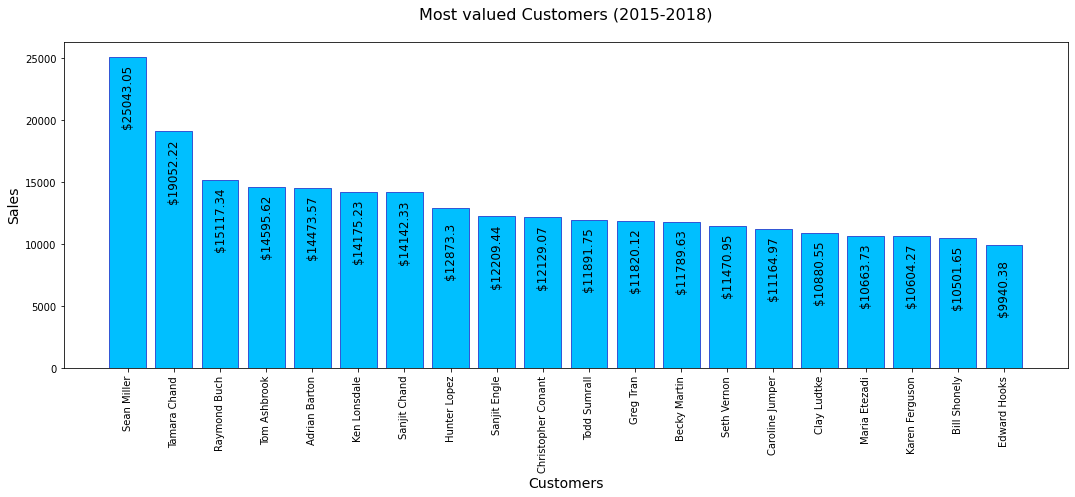

In [9]:
# plot bar of the top valued customers
plt.figure(figsize=[18,6])
plt.bar(top_customers.index, top_customers.Sales, color='#00BFFF', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Most valued Customers (2015-2018)\n", fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in enumerate(top_customers.Sales):
    plt.text(i, v-5500, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

### Top Revenue Generated Cities

Let's get the Top Revenue generated Cities for the company.

In [10]:
top_cities = data.groupby(by=['City']).sum().round(2)
top_cities = top_cities.sort_values('Sales', ascending=False).head(20)

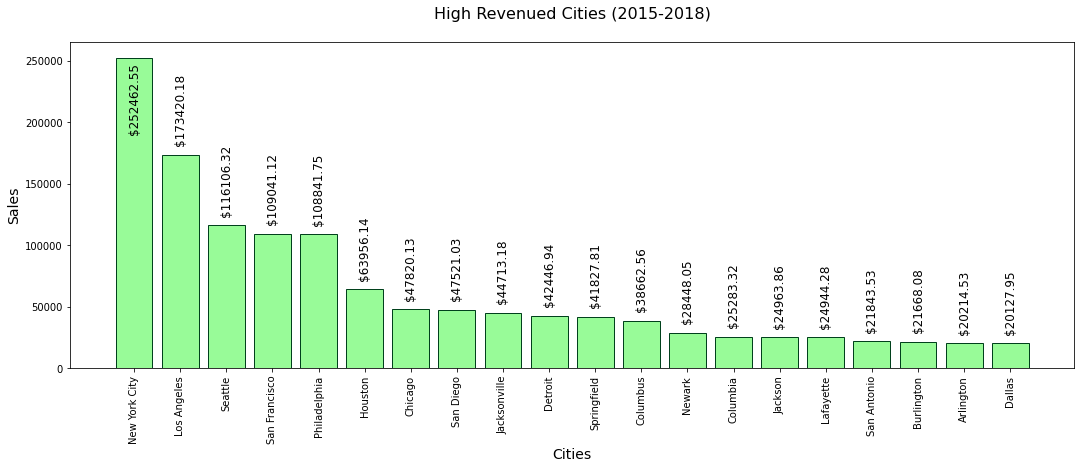

In [11]:
# plot bar of the top revenue generated Cities
plt.figure(figsize=[18,6])
plt.bar(top_cities.index, top_cities.Sales, color='#98FB98', edgecolor='#01411C')
plt.xticks(rotation=90)
plt.title("High Revenued Cities (2015-2018)\n", fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_cities.Sales.items():
    if v>200000:
        plt.text(i, v-60000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+10000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

### Top Revenue Generated States

Let's get the Top Revenue generated States for the company.

In [12]:
top_states = data.groupby(by=['State']).sum().round(2)
top_states = top_states.sort_values('Sales', ascending=False).head(20)

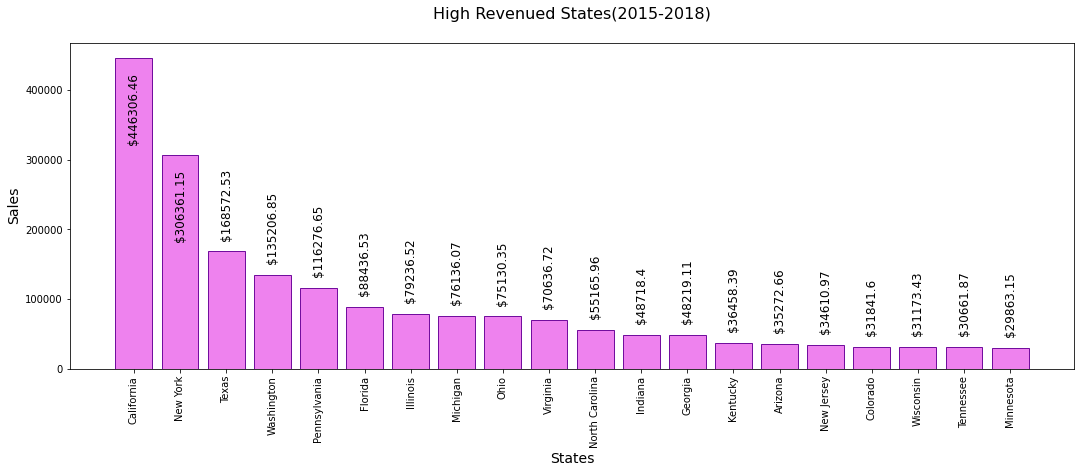

In [13]:
# plot bar of the top revenue generated States
plt.figure(figsize=[18,6])
plt.bar(top_states.index, top_states.Sales, color='#EE82EE', edgecolor='#720e9e')
plt.xticks(rotation=90)
plt.title("High Revenued States(2015-2018)\n", fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_states.Sales.items():
    if v>300000:
        plt.text(i, v-120000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+20000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

### Top Products that has generated more sales.

Let's analyze the Top Products for the company.

In [14]:
top_products = data.groupby(by=['Product Name']).sum().round(2)
top_products = top_products.sort_values('Sales', ascending=False).head(20)

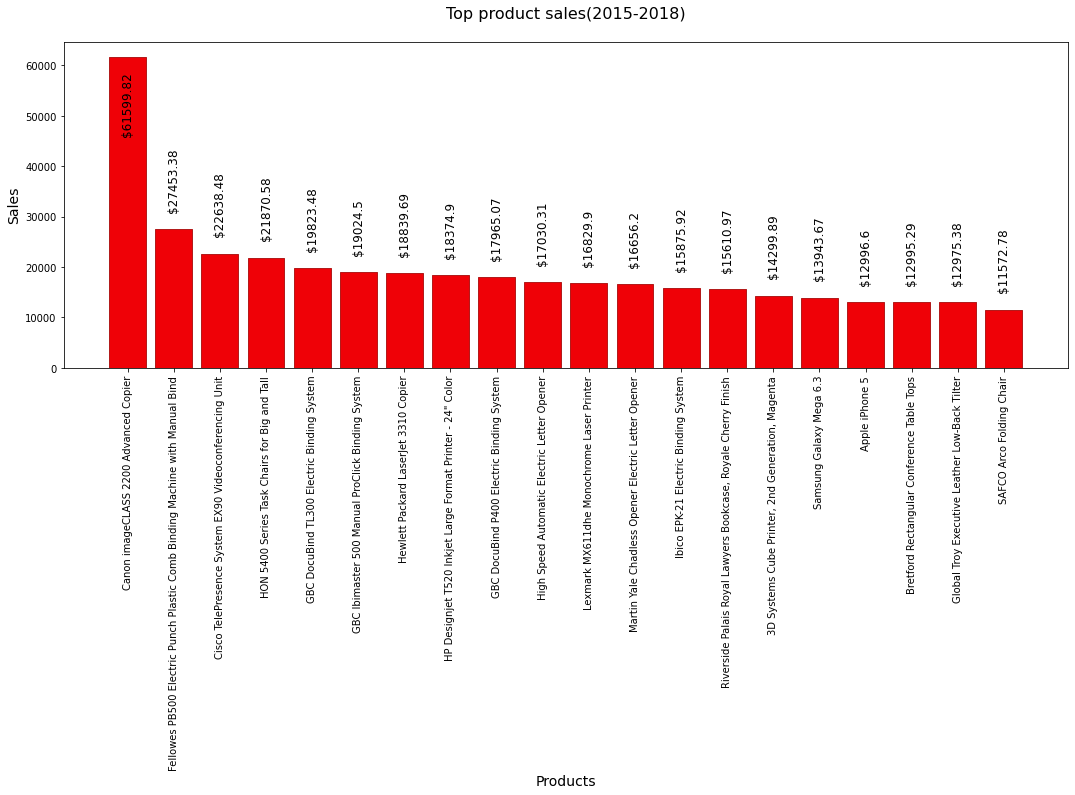

In [15]:
# plot bar of the top Products with highest sales
plt.figure(figsize=[18,6])
plt.bar(top_products.index, top_products.Sales, color='#EF0107', edgecolor='#B31B1B')
plt.xticks(rotation=90)
plt.title("Top product sales(2015-2018)\n", fontsize=16)
plt.xlabel('Products', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_products.Sales.items():
    if v>60000:
        plt.text(i, v-15000, s='$'+str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+4000, s='$'+str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

Task to be: Get the categorical column analysis wrt count and sales data.

#### Get the columns that are categorical

In [16]:
# columns that have less than 20 unique values
cat_cols_dic = {}
for i in range(len(data.nunique())):
    if data.nunique().values[i]<=20:
        cat_cols_dic[data.nunique().index[i]] = data.nunique().values[i]

print(cat_cols_dic)

{'Ship Mode': 4, 'Segment': 3, 'Country': 1, 'Region': 4, 'Category': 3, 'Sub-Category': 17}


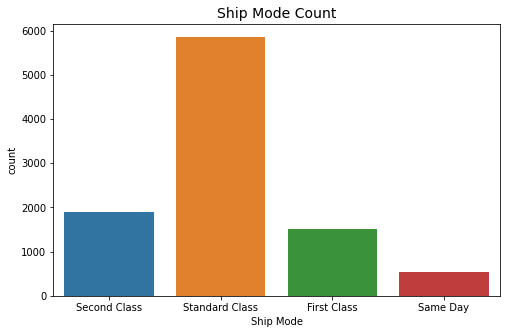

In [17]:
# ship mode count visualization
plt.figure(figsize=[8,5])
sns.countplot(data['Ship Mode'])
plt.title("Ship Mode Count", fontsize=14)
plt.show()

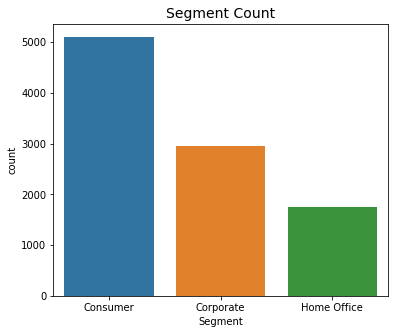

In [18]:
# segment count visualization
plt.figure(figsize=[6,5])
sns.countplot(data['Segment'])
plt.title("Segment Count", fontsize=14)
plt.show()

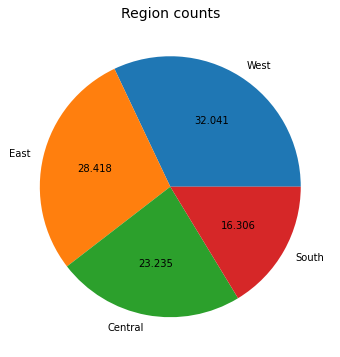

In [19]:
# pie chat for 'region'
plt.figure(figsize=[6, 6])
plt.pie(data['Region'].value_counts(normalize=True), labels= data['Region'].value_counts().index, autopct="%.3f")
plt.title("Region counts", fontsize=14)
plt.show()

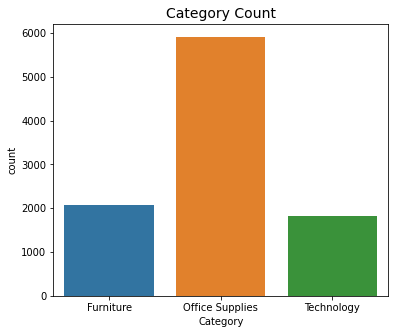

In [20]:
# Category count visualization
plt.figure(figsize=[6,5])
sns.countplot(data['Category'])
plt.title("Category Count", fontsize=14)
plt.show()

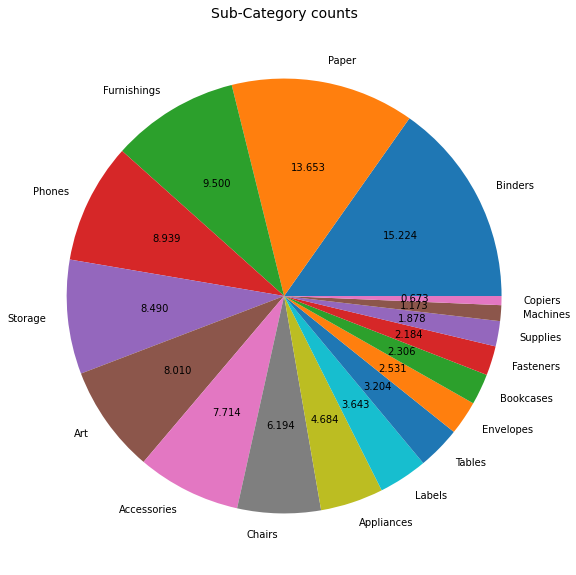

In [21]:
# pie chat for 'sub-category'
plt.figure(figsize=[10, 10])
plt.pie(data['Sub-Category'].value_counts(normalize=True)*100, labels= data['Sub-Category'].value_counts().index, autopct="%.3f")
plt.title("Sub-Category counts", fontsize=14)
plt.show()

In [22]:
print(data.shape)
data.head()

(9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [23]:
# Customers count
data['Customer Name'].nunique()

793

## Time Series Analysis

In [24]:
main_df = data.sort_values(by='Order Date', ascending=True)[['Order Date', 'Sales']]
main_df.set_index('Order Date', inplace=True)
main_df.head(10)

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
2015-01-06,755.960
2015-01-06,391.980
2015-01-06,19.440
2015-01-06,2573.820


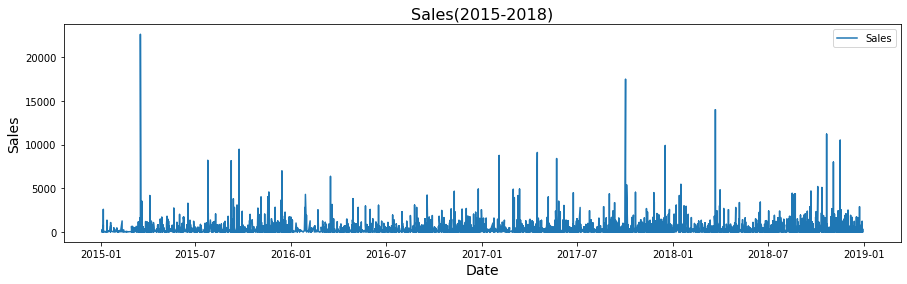

In [25]:
# plot the sales graph
plt.figure(figsize=[15, 4])
plt.plot(main_df, label='Sales')
plt.title('Sales(2015-2018)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()
plt.show()